In [1]:
import numpy as np
import pandas as pd
import time
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  make_scorer

from xgboost import XGBClassifier
from xgboost import plot_importance

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
df = pd.read_csv('/project_data/data_asset/test_data - data_test.csv_shaped_a771cb7f.csv')
df.head()


,INN_CODE,class_sign,Generator_emb,Consumer_emb,GP_emb,RLS_1,RLS_2,RLS_test
0,6670129804,0,0,1,0,0.1,0.2,0.3
1,3525014344,0,0,1,0,0.0,0.0,0.0
2,570006131,0,0,1,0,0.0,0.0,0.0
3,7204084481,0,0,1,0,0.0,0.0,0.0
4,3013015987,0,0,1,0,0.0,0.0,0.0


In [7]:
feature_columns = list(df.columns.values)[2:]
target_column = list(df.columns.values)[1]
feature_columns
target_column

'class_sign'

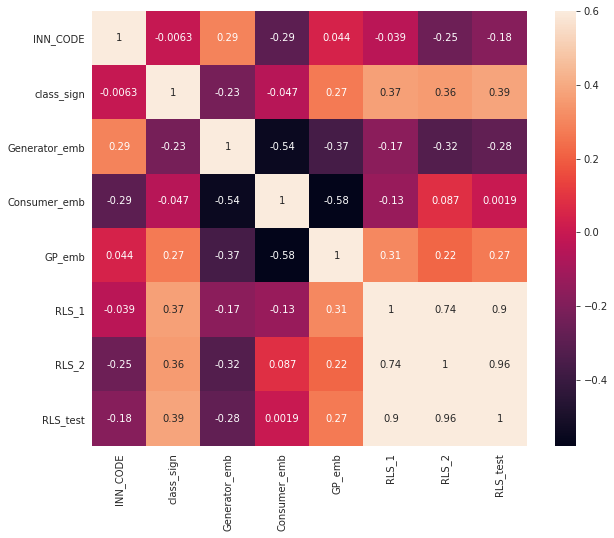

In [8]:
plt.figure(figsize=(10,8))
foo = sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

In [9]:
train_X = df[feature_columns]
train_y = df[target_column]

In [10]:
train_X

,Generator_emb,Consumer_emb,GP_emb,RLS_1,RLS_2,RLS_test
0,0,1,0,0.1,0.2,0.3
1,0,1,0,0.0,0.0,0.0
2,0,1,0,0.0,0.0,0.0
3,0,1,0,0.0,0.0,0.0
4,0,1,0,0.0,0.0,0.0
5,0,1,0,0.0,0.0,0.0
6,0,1,0,0.0,0.0,0.0
7,0,1,0,0.0,0.0,0.0
8,0,1,0,0.0,0.0,0.0
9,0,1,0,0.0,0.0,0.0


In [11]:
train_y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    1
35    1
36    1
37    1
38    1
Name: class_sign, dtype: int64

In [12]:
model = XGBClassifier()

In [13]:
both_scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Loss':'neg_log_loss'}
params = {'n_estimators': [100,200,400,600],
          'learning_rate': [0.01,0.05,0.1,0.3]    
}

In [14]:
clf = GridSearchCV(model, params, cv=3, scoring=both_scoring, refit='AUC', return_train_score=True, verbose =2)
clf.fit(train_X,train_y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. learning_rate=0.01, n_estimators=100, total=   0.2s
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] ............. learning_rate=0.01, n_estimators=100, total=   0.1s
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] ............. learning_rate=0.01, n_estimators=100, total=   0.0s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV] ............. learning_rate=0.01, n_estimators=200, total=   0.0s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV] ............. learning_rate=0.01, n_estimators=200, total=   0.0s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV] ............. learning_rate=0.01, n_estimators=200, total=   0.0s
[CV] learning_rate=0.01, n_estimators=400 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............. learning_rate=0.01, n_estimators=400, total=   0.0s
[CV] learning_rate=0.01, n_estimators=400 ............................
[CV] ............. learning_rate=0.01, n_estimators=400, total=   0.0s
[CV] learning_rate=0.01, n_estimators=400 ............................
[CV] ............. learning_rate=0.01, n_estimators=400, total=   0.0s
[CV] learning_rate=0.01, n_estimators=600 ............................
[CV] ............. learning_rate=0.01, n_estimators=600, total=   0.0s
[CV] learning_rate=0.01, n_estimators=600 ............................
[CV] ............. learning_rate=0.01, n_estimators=600, total=   0.0s
[CV] learning_rate=0.01, n_estimators=600 ............................
[CV] ............. learning_rate=0.01, n_estimators=600, total=   0.0s
[CV] learning_rate=0.05, n_estimators=100 ............................
[CV] ............. learning_rate=0.05, n_estimators=100, total=   0.0s
[CV] learning_rate=0.05, n_estimators=100 ............................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.6s finished
/opt/conda/envs/Python-3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 400, 600], 'learning_rate': [0.01, 0.05, 0.1, 0.3]},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score=True,
       scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Loss': 'neg_log_loss'},
       verbose=2)

In [15]:
print((clf.best_score_,clf.best_params_))
print("="*30)

print("Grid scores on training data:")
means = clf.cv_results_['mean_test_AUC']
stds = clf.cv_results_['std_test_AUC']
log_losses = clf.cv_results_['std_test_Loss']

for mean, std, log_loss, params in zip(means, stds, log_losses, clf.cv_results_['params']):
  print("AUC Score: %0.3f (+/-%0.03f); Log Loss: %0.3f for %r" % (mean, std * 2, log_loss, params))

(0.5541958041958042, {'learning_rate': 0.01, 'n_estimators': 400})
Grid scores on training data:
AUC Score: 0.524 (+/-0.132); Log Loss: 0.026 for {'learning_rate': 0.01, 'n_estimators': 100}
AUC Score: 0.524 (+/-0.132); Log Loss: 0.021 for {'learning_rate': 0.01, 'n_estimators': 200}
AUC Score: 0.554 (+/-0.216); Log Loss: 0.043 for {'learning_rate': 0.01, 'n_estimators': 400}
AUC Score: 0.554 (+/-0.216); Log Loss: 0.056 for {'learning_rate': 0.01, 'n_estimators': 600}
AUC Score: 0.554 (+/-0.216); Log Loss: 0.052 for {'learning_rate': 0.05, 'n_estimators': 100}
AUC Score: 0.554 (+/-0.216); Log Loss: 0.059 for {'learning_rate': 0.05, 'n_estimators': 200}
AUC Score: 0.554 (+/-0.216); Log Loss: 0.059 for {'learning_rate': 0.05, 'n_estimators': 400}
AUC Score: 0.554 (+/-0.216); Log Loss: 0.059 for {'learning_rate': 0.05, 'n_estimators': 600}
AUC Score: 0.524 (+/-0.132); Log Loss: 0.060 for {'learning_rate': 0.1, 'n_estimators': 100}
AUC Score: 0.524 (+/-0.132); Log Loss: 0.060 for {'learnin